## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import expon

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [14]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[36, 58, 66],
       [ 7, 19, 65],
       [35, 49, 88],
       [16, 25, 72],
       [51, 59, 85],
       [ 3,  8, 64]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([36, 58, 66]), array([ 7, 19, 65]))

The lowest card in the game is

In [5]:
np.min(cards)

3

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

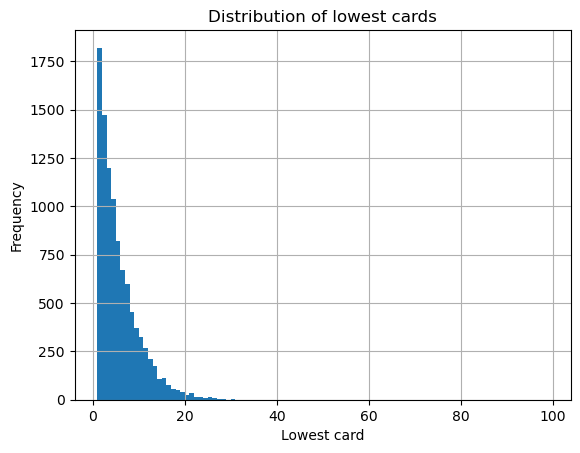

In [4]:
# To Do cell
N=100
trials=10000
lowest=[]
for i in range(trials):
    cards=sample_cards(100,6,3)
    lowest.append(np.min(cards))
plt.hist(lowest,bins=np.arange(1,N))
plt.title("Distribution of lowest cards")
plt.xlabel("Lowest card")
plt.ylabel("Frequency")
plt.grid(True)
#cards=sample_cards(100,6,3)
#lowest=np.min(cards)


### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

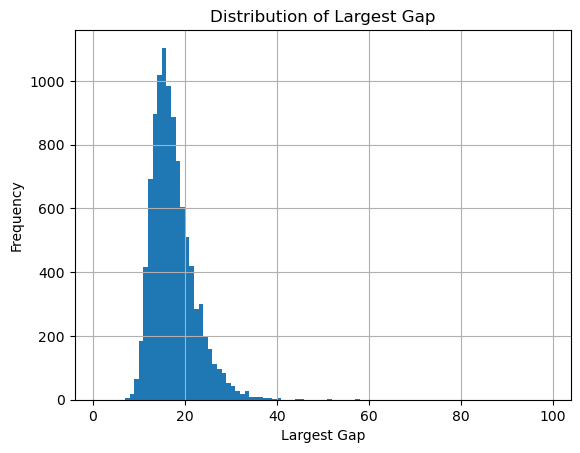

In [4]:
# To Do cell
n=6
k=3
maxdistance=[]
trials=10000
for j in range(trials):
    distance=[]
    cards=sample_cards(100,n,k)
    flattened=np.ndarray.flatten(cards)
    sortcards=np.sort(flattened)
    for i in range(len(sortcards)-1):
        distance.append((sortcards[i+1]-sortcards[i]))
    maxdistance.append(max(distance))

plt.hist(maxdistance,bins=np.arange(1,N))
plt.title("Distribution of Largest Gap")
plt.xlabel("Largest Gap")
plt.ylabel("Frequency")
plt.grid(True)

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

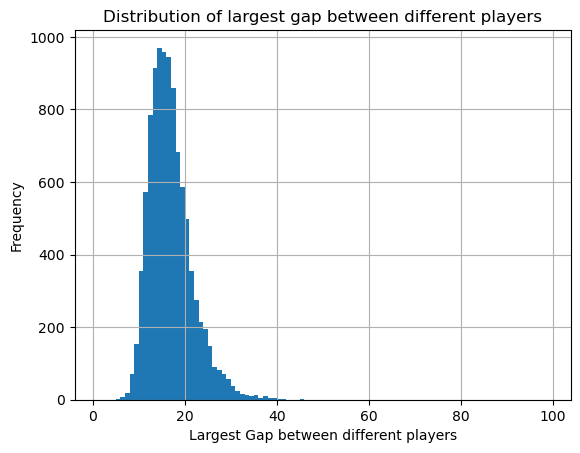

In [6]:
k=3
n=6
trials=10000
gapmax=[]
for i in range(trials):
    cards=sample_cards(100,n,k)
    player_ids=np.tile(np.arange(1,n+1),(k,1)).T
    flat_cards,flat_ids=cards.flatten(), player_ids.flatten()
    order_ids=np.argsort(flat_cards)
    gap_cards=np.diff(flat_cards[order_ids])
    gap_ids=np.diff(flat_ids[order_ids])
    gap_unique=gap_cards*(gap_ids!=0)
    gapmax.append(np.max(gap_unique))
    
   
plt.hist(gapmax,bins=np.arange(1,N))
plt.title("Distribution of largest gap between different players")
plt.xlabel("Largest Gap between different players")
plt.ylabel("Frequency")
plt.grid(True)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

The following histograms show that the mean of the largest gap between all cards tends to be larger. The gap tends to increase as the total number of players decreases


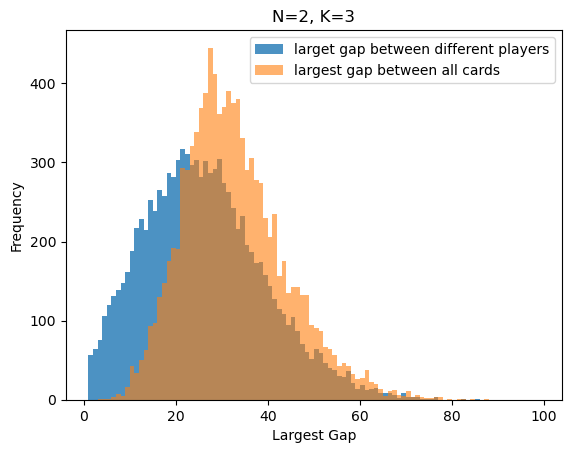

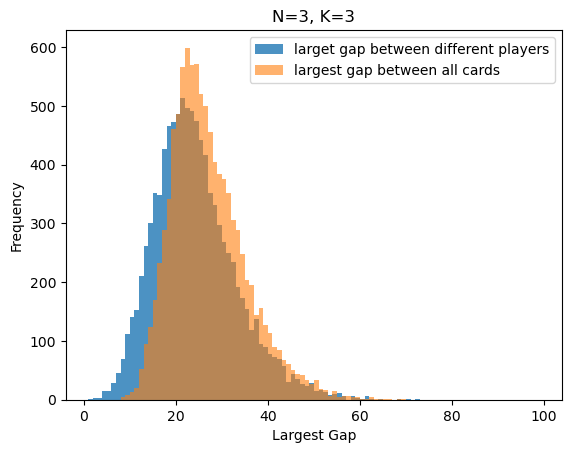

In [28]:
N=100
n=3
k=3
maxdistance=[]
trials=10000
for j in range(trials):
    distance=[]
    cards=sample_cards(100,n,k)
    flattened=np.ndarray.flatten(cards)
    sortcards=np.sort(flattened)
    for i in range(len(sortcards)-1):
        distance.append((sortcards[i+1]-sortcards[i]))
    maxdistance.append(max(distance))

maxdistance3=maxdistance

k=3
n=3
trials=10000
gapmax=[]
for i in range(trials):
    cards=sample_cards(100,n,k)
    player_ids=np.tile(np.arange(1,n+1),(k,1)).T
    flat_cards,flat_ids=cards.flatten(), player_ids.flatten()
    order_ids=np.argsort(flat_cards)
    gap_cards=np.diff(flat_cards[order_ids])
    gap_ids=np.diff(flat_ids[order_ids])
    gap_unique=gap_cards*(gap_ids!=0)
    gapmax.append(np.max(gap_unique))
gapmax3=gapmax 
print("The following histograms show that the mean of the largest gap between all cards tends to be larger. The gap tends to increase as the total number of players decreases")

N=100
n=2
k=3
maxdistance=[]
trials=10000
for j in range(trials):
    distance=[]
    cards=sample_cards(100,n,k)
    flattened=np.ndarray.flatten(cards)
    sortcards=np.sort(flattened)
    for i in range(len(sortcards)-1):
        distance.append((sortcards[i+1]-sortcards[i]))
    maxdistance.append(max(distance))

maxdistance2=maxdistance

k=3
n=2
trials=10000
gapmax=[]
for i in range(trials):
    cards=sample_cards(100,n,k)
    player_ids=np.tile(np.arange(1,n+1),(k,1)).T
    flat_cards,flat_ids=cards.flatten(), player_ids.flatten()
    order_ids=np.argsort(flat_cards)
    gap_cards=np.diff(flat_cards[order_ids])
    gap_ids=np.diff(flat_ids[order_ids])
    gap_unique=gap_cards*(gap_ids!=0)
    gapmax.append(np.max(gap_unique))
gapmax2=gapmax 



plt.hist(gapmax2,alpha=0.8,label='larget gap between different players',bins=np.arange(1,N))
plt.hist(maxdistance2,alpha=0.6,label='largest gap between all cards',bins=np.arange(1,N))
plt.title('N=2, K=3')
plt.ylabel('Frequency')
plt.xlabel('Largest Gap')
plt.legend()
plt.show()
#mean of max between all cards tends to be larger. The gap tends to be larger as the total number of players decreases.


plt.hist(gapmax3,alpha=0.8,label='larget gap between different players',bins=np.arange(1,N))
plt.hist(maxdistance3,alpha=0.6,label='largest gap between all cards',bins=np.arange(1,N))
plt.title('N=3, K=3')
plt.ylabel('Frequency')
plt.xlabel('Largest Gap')
plt.legend()
plt.show()
#mean of max between all cards tends to be larger. The gap tends to be larger as the total number of players decreases.

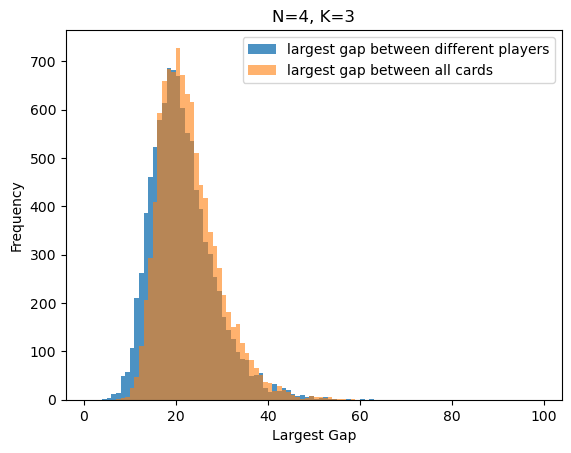

In [30]:
#mean of max between all cards tends to be larger. The gap tends to be larger as the total number of players decreases.
n=4
k=3
maxdistance=[]
trials=10000
for j in range(trials):
    distance=[]
    cards=sample_cards(100,n,k)
    flattened=np.ndarray.flatten(cards)
    sortcards=np.sort(flattened)
    for i in range(len(sortcards)-1):
        distance.append((sortcards[i+1]-sortcards[i]))
    maxdistance.append(max(distance))

maxdistance4=maxdistance

k=3
n=4
trials=10000
gapmax=[]
for i in range(trials):
    cards=sample_cards(100,n,k)
    player_ids=np.tile(np.arange(1,n+1),(k,1)).T
    flat_cards,flat_ids=cards.flatten(), player_ids.flatten()
    order_ids=np.argsort(flat_cards)
    gap_cards=np.diff(flat_cards[order_ids])
    gap_ids=np.diff(flat_ids[order_ids])
    gap_unique=gap_cards*(gap_ids!=0)
    gapmax.append(np.max(gap_unique))
gapmax4=gapmax  

plt.hist(gapmax4,alpha=0.8,label='largest gap between different players',bins=np.arange(1,N))
plt.hist(maxdistance4,alpha=0.6,label='largest gap between all cards',bins=np.arange(1,N))
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Largest Gap')
plt.title("N=4, K=3")
plt.show()


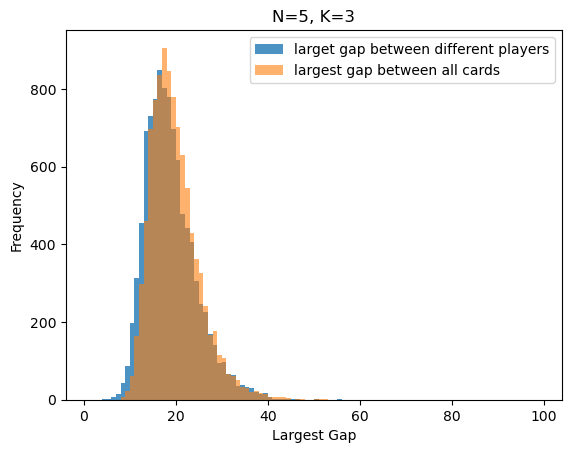

In [31]:
n=5
k=3
maxdistance=[]
trials=10000
for j in range(trials):
    distance=[]
    cards=sample_cards(100,n,k)
    flattened=np.ndarray.flatten(cards)
    sortcards=np.sort(flattened)
    for i in range(len(sortcards)-1):
        distance.append((sortcards[i+1]-sortcards[i]))
    maxdistance.append(max(distance))

maxdistance5=maxdistance

k=3
n=5
trials=10000
gapmax=[]
for i in range(trials):
    cards=sample_cards(100,n,k)
    player_ids=np.tile(np.arange(1,n+1),(k,1)).T
    flat_cards,flat_ids=cards.flatten(), player_ids.flatten()
    order_ids=np.argsort(flat_cards)
    gap_cards=np.diff(flat_cards[order_ids])
    gap_ids=np.diff(flat_ids[order_ids])
    gap_unique=gap_cards*(gap_ids!=0)
    gapmax.append(np.max(gap_unique))
gapmax5=gapmax 


plt.hist(gapmax5,alpha=0.8,label='larget gap between different players',bins=np.arange(1,N))
plt.hist(maxdistance5,alpha=0.6,label='largest gap between all cards',bins=np.arange(1,N))
plt.title("N=5, K=3")
plt.ylabel('Frequency')
plt.xlabel('Largest Gap')
plt.legend()
plt.show()



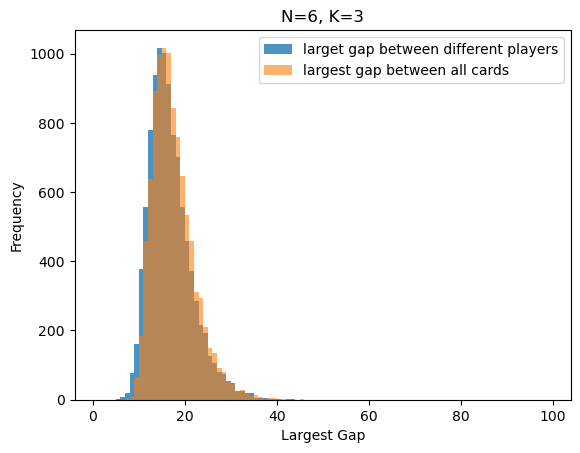

In [32]:
n=6
k=3
maxdistance=[]
trials=10000
for j in range(trials):
    distance=[]
    cards=sample_cards(100,n,k)
    flattened=np.ndarray.flatten(cards)
    sortcards=np.sort(flattened)
    for i in range(len(sortcards)-1):
        distance.append((sortcards[i+1]-sortcards[i]))
    maxdistance.append(max(distance))

maxdistance6=maxdistance

k=3
n=6
trials=10000
gapmax=[]
for i in range(trials):
    cards=sample_cards(100,n,k)
    player_ids=np.tile(np.arange(1,n+1),(k,1)).T
    flat_cards,flat_ids=cards.flatten(), player_ids.flatten()
    order_ids=np.argsort(flat_cards)
    gap_cards=np.diff(flat_cards[order_ids])
    gap_ids=np.diff(flat_ids[order_ids])
    gap_unique=gap_cards*(gap_ids!=0)
    gapmax.append(np.max(gap_unique))
gapmax6=gapmax 



plt.hist(gapmax6,alpha=0.8,label='larget gap between different players',bins=np.arange(1,N))
plt.hist(maxdistance6,alpha=0.6,label='largest gap between all cards',bins=np.arange(1,N))
plt.title('N=6, K=3')
plt.ylabel('Frequency')
plt.xlabel('Largest Gap')
plt.legend()
plt.show()
#mean of max between all cards tends to be larger. The gap tends to be larger as the total number of players decreases.

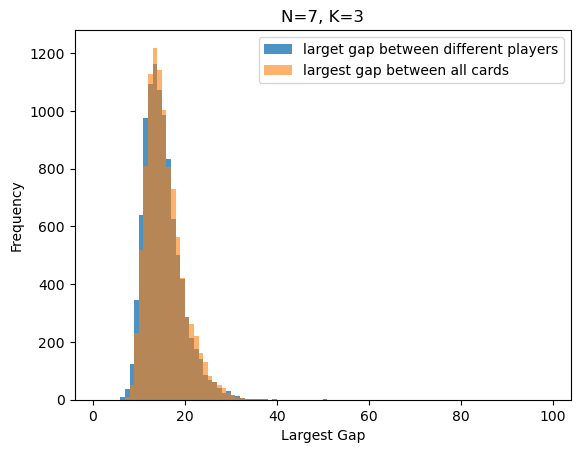

In [33]:
n=7
k=3
maxdistance=[]
trials=10000
for j in range(trials):
    distance=[]
    cards=sample_cards(100,n,k)
    flattened=np.ndarray.flatten(cards)
    sortcards=np.sort(flattened)
    for i in range(len(sortcards)-1):
        distance.append((sortcards[i+1]-sortcards[i]))
    maxdistance.append(max(distance))

maxdistance7=maxdistance

k=3
n=7
trials=10000
gapmax=[]
for i in range(trials):
    cards=sample_cards(100,n,k)
    player_ids=np.tile(np.arange(1,n+1),(k,1)).T
    flat_cards,flat_ids=cards.flatten(), player_ids.flatten()
    order_ids=np.argsort(flat_cards)
    gap_cards=np.diff(flat_cards[order_ids])
    gap_ids=np.diff(flat_ids[order_ids])
    gap_unique=gap_cards*(gap_ids!=0)
    gapmax.append(np.max(gap_unique))
gapmax7=gapmax 


plt.hist(gapmax7,alpha=0.8,label='larget gap between different players',bins=np.arange(1,N))
plt.hist(maxdistance7,alpha=0.6,label='largest gap between all cards',bins=np.arange(1,N))
plt.title("N=7, K=3")
plt.ylabel('Frequency')
plt.xlabel('Largest Gap')
plt.legend()
plt.show()



As you can see, the gap tends to be larger between all cards than when just looking between different players. This gap decreases as n (number of players) increases.


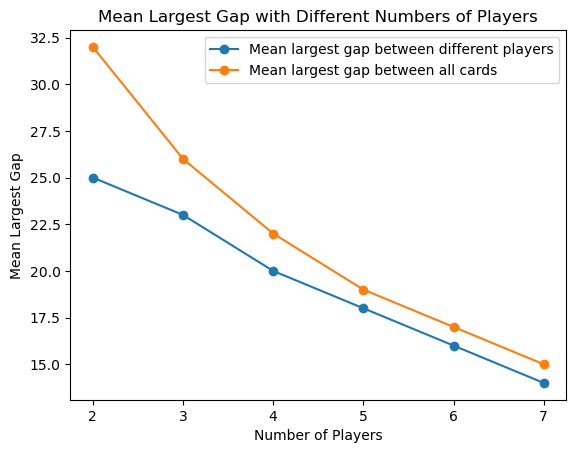

In [34]:
mean4all=stat.mean(maxdistance4)
mean4between=stat.mean(gapmax4)
mean5all=stat.mean(maxdistance5)
mean5between=stat.mean(gapmax5)
mean6all=stat.mean(maxdistance6)
mean6between=stat.mean(gapmax6)
mean3all=stat.mean(maxdistance3)
mean3between=stat.mean(gapmax3)
mean7all=stat.mean(maxdistance7)
mean7between=stat.mean(gapmax7)
mean2all=stat.mean(maxdistance2)
mean2between=stat.mean(gapmax2)


x=(2,3,4,5,6,7)
meanall=(mean2all, mean3all,mean4all,mean5all,mean6all,mean7all)
meanbetween=(mean2between,mean3between,mean4between,mean5between,mean6between,mean7between)

plt.plot(x,meanbetween,'o-',label='Mean largest gap between different players')
plt.plot(x,meanall,'o-', label='Mean largest gap between all cards')
plt.title('Mean Largest Gap with Different Numbers of Players')
plt.xlabel("Number of Players")
plt.ylabel('Mean Largest Gap')
plt.legend()
print("As you can see, the gap tends to be larger between all cards than when just looking between different players. This gap decreases as n (number of players) increases.")

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

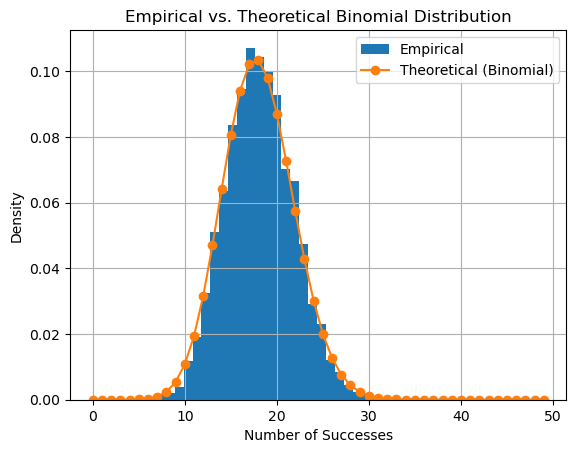

In [8]:
# To Do cell


#I am plotting the binomial distribution of how frequently a one is dealt out of 100 rounds of games

def count_card(N, n, k, iterations, trials):

    trial_counts = []
    for _ in range(trials):
        counts = []
        for _ in range(iterations):
            sample = sample_cards(N, n, k)
            count = np.sum(sample == 1)
            counts.append(count)
        trial_counts.append(np.sum(counts))
    return trial_counts


N, n, k = 100, 6, 3
iterations = 100
trials = 10000

counts = count_card(N, n, k, iterations, trials)
p = 0.18  # Probability a player has the card "1"

# Getting the theoretical binomial distribution
rv = binom(iterations, p)
x = np.arange(0, 50)
theoretical_probs = rv.pmf(x)

# Plotting the results
plt.hist(counts, density=True, align='mid', bins=30,label="Empirical")
plt.plot(x, theoretical_probs, 'o-', label="Theoretical (Binomial)")
plt.xlabel("Number of Successes")
plt.ylabel("Density")
plt.title("Empirical vs. Theoretical Binomial Distribution")
plt.legend()
plt.grid(True)
plt.show()


### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

In [8]:
#k=1, n=18

18

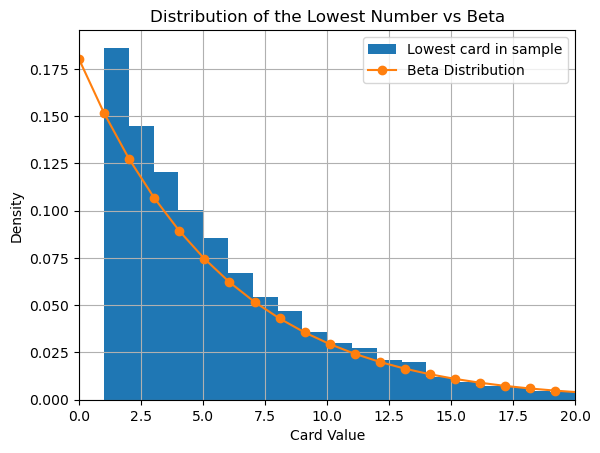

In [15]:
# To Do cell
trials=10000
N=100
lowest=[]
for i in range(trials):
    cards=sample_cards(100,6,3)
    lowest.append(np.min(cards))
plt.hist(lowest,density=True,bins=np.arange(1,40),label='Lowest card in sample')
x=np.linspace(0,1,100)
y=beta.pdf(x,1,18) #n+k-1, also 1/stat.mean(lowest)
plt.plot(x*100,y/100,'o-', label="Beta Distribution")
plt.title('Distribution of the Lowest Number vs Beta')
plt.xlabel("Card Value")
plt.ylabel("Density")
plt.xlim(0,20)
plt.legend()
plt.grid(True)
#k=number of successes
#n=number of trials

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

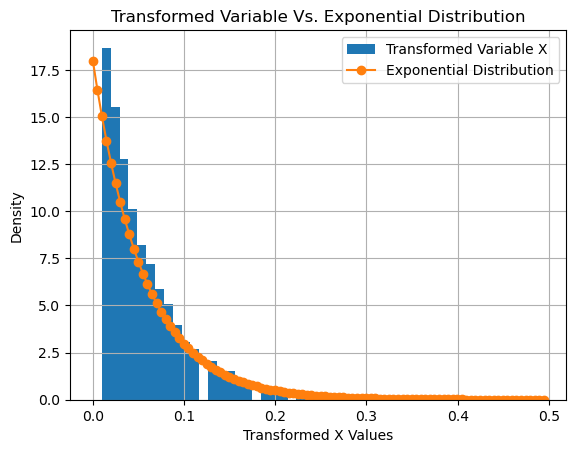

In [29]:
trials=10000
n=6
k=3
lowest=[]
for i in range(trials):
    cards=sample_cards(100,n,k)
    lowest.append(np.min(cards))
x=[]
for i in range(trials):
    x.append(-np.log((1-lowest[i]/100)))
plt.hist(x, density=True, bins=50,label='Transformed Variable X')
lambda1=n*k
x1=np.linspace(0,max(x),100)
y1=expon.pdf(x1,scale=1/lambda1)
plt.plot(x1,y1,'o-',label="Exponential Distribution")
plt.title("Transformed Variable Vs. Exponential Distribution")
plt.xlabel('Transformed X Values')
plt.ylabel("Density")
plt.grid(True)

plt.legend()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [105]:
# To Do cell
def samplewithout(N,n,k):
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    return _cards

def samplewith(N,n,k):
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    return _cards

iterations=10000
def get_lowest(N,n,k,iterations,replacement=False):
    if replacement:
        samplingfunc=samplewith
    else:
        samplingfunc=samplewithout
    lowest=[]
    for i in range(iterations):
        cards=samplingfunc(N,n,k)
        lowest.append(np.min(cards))
    return lowest



In [106]:
# TO DO CELL
iterations=10000
N=np.arange(100,2000,100)
n=6
k=3

def meanswith(N,n,k):
    meansw=[]
    for i in range(len(N)):
        singlemean = np.mean(get_lowest(N[i],n,k,iterations,replacement=True))/N[i]
        meansw.append(singlemean)
    return(meansw)

def meanswithout(N,n,k):
    meanswo=[]
    for i in range(len(N)):
        singlemean = np.mean(get_lowest(N[i],n,k,iterations,replacement=False))/N[i]
        meanswo.append(singlemean)
    return(meanswo)

stdmeanwith=meanswith(N,n,k)
stdmeanwithout=meanswithout(N,n,k)


When N is a relatively smaller value (100 to around 500) we can see that sampling without replacement typically gives a lower lowest number. However, as N increases, the difference between the sampling strategies shrinks and the sampling strategies yield similar results. It seems as though the results of sampling without replacement do not change much when N increases but for sampling with replacement the mean lowest number decreases when N increases.


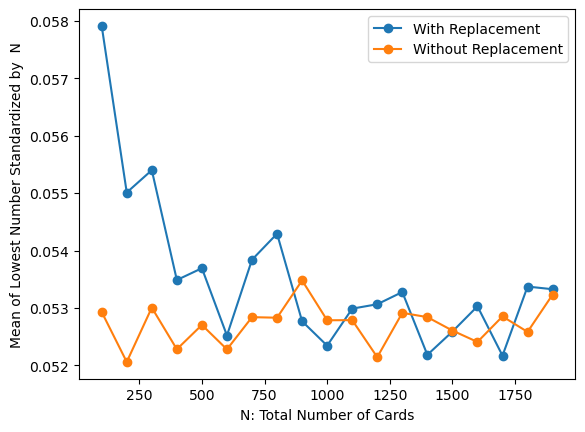

In [110]:
print("When N is a relatively smaller value (100 to around 500) we can see that sampling without replacement typically gives a lower lowest number. However, as N increases, the difference between the sampling strategies shrinks and the sampling strategies yield similar results. It seems as though the results of sampling without replacement do not change much when N increases but for sampling with replacement the mean lowest number decreases when N increases.")
plt.plot(N,stdmeanwith,"o-",label="With Replacement") 
plt.plot(N,stdmeanwithout,"o-",label="Without Replacement")
plt.ylabel("Mean of Lowest Number Standardized by  N")
plt.xlabel("N: Total Number of Cards")
plt.legend()
plt.show()

Here you can see an example of a comparison of the lowest number between different sampling strategies when N=100. The results here paint a similar picture as the line plot above: we see that sampling without replacement typically yields lower numbers than sampling with replacement. We can see this because the frequency of lower numbers is higher for sampling without replacement and the frequency of higher numbers is higher for sampling with replacement


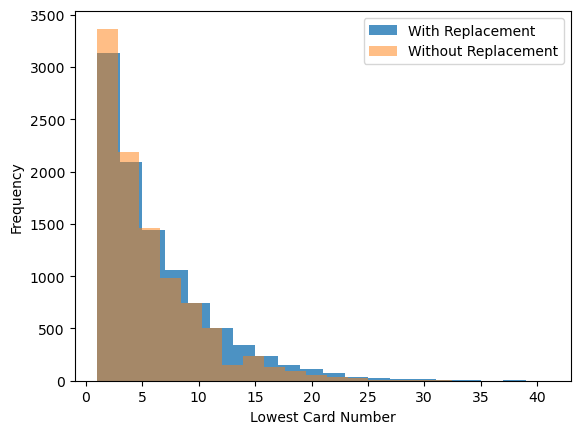

In [113]:
N=100
trials=100000
lowestwith=get_lowest(N,n,k,iterations,replacement=True)
lowestwithout=get_lowest(N,n,k,iterations)
print("Here you can see an example of a comparison of the lowest number between different sampling strategies when N=100. The results here paint a similar picture as the line plot above: we see that sampling without replacement typically yields lower numbers than sampling with replacement. We can see this because the frequency of lower numbers is higher for sampling without replacement and the frequency of higher numbers is higher for sampling with replacement")
plt.hist(lowestwith,alpha=0.8,bins=20,label="With Replacement")
plt.hist(lowestwithout,alpha=0.5,bins=20,label="Without Replacement")
plt.xlabel("Lowest Card Number")
plt.ylabel("Frequency")
plt.legend()


### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: 
- Member No2: 
- Member No3: